In [1]:
from kafka import KafkaConsumer
import matplotlib.pyplot as plt
import json
import threading

In [2]:
consumer = KafkaConsumer('output',
                         group_id='output',
                         bootstrap_servers=['localhost:9092'],
                        )
print("consumer started ...")

consumer started ...


In [3]:
x = {}

In [4]:
def plot():
    global x
    for message in consumer:
        x[json.loads((message.value).decode("utf-8"))["city"]] = json.loads((message.value).decode("utf-8"))["city_count"]

In [5]:
plot_thread = threading.Thread(target=plot)

In [6]:
plot_thread.start()

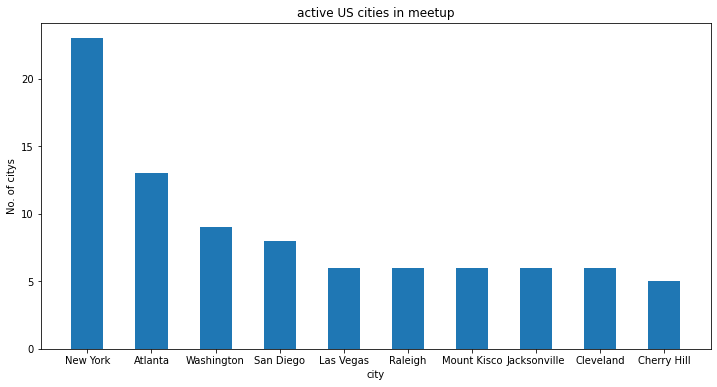

In [7]:
try:
    fig = plt.figure(figsize = (12, 6))
    x = dict(sorted(x.items(), key=lambda item: item[1], reverse=True))

    plt.bar([*x.keys()][:10], [*x.values()][:10], width = 0.5)

    plt.xlabel("city")
    plt.ylabel("No. of citys")
    plt.title("active US cities in meetup")
    plt.show()
except:
    print(f"atleast 10 data needed but {len(x)} data is there")